# GRIP @ THE SPARKS FOUNDATION 

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN   

### AUTHOR: TUSHAR KUMAR

## TASK 1: PREDICTION USING SUPERVISED ML
  
### TO PREDICT THE SCORE OF THE STUDENT WHO STUDIES 9.25 HOURS/DAY USING LINEAR REGRESSION MODEL.

## STEPS INVOLVED:    
### 1. IMPORTING LIBRARIES AND DATA TO BE USED
### 2. GATHERING INSIGHTS
### 3. VISUALIZING DATA
### 4. SPLITTING AND TRAINING THE MODEL
### 5. EVALUATE THE MODEL
### 6. PREDICT THE SCORE

## Step 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [1]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

In [2]:
# importing data
df = pd.read_csv('student_scores.csv') # task_1 data importing
df.head(10) # fetching first 10 rows of the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 2 : GATHERING INSIGHTS

In [3]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (25, 2)


In [4]:
# statistical description of data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Step 3 : VISUALIZING DATA

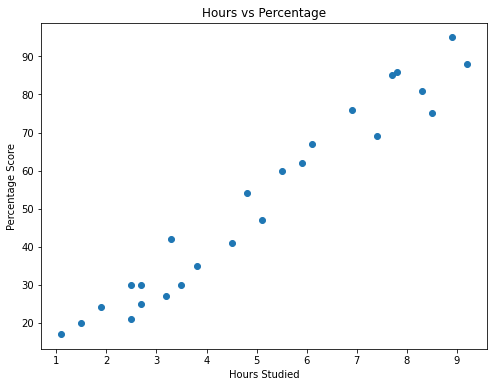

In [6]:
# Plotting the distribution of scores
plt.figure(figsize=(8,6))
plt.scatter(x='Hours', y='Scores',data=df)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

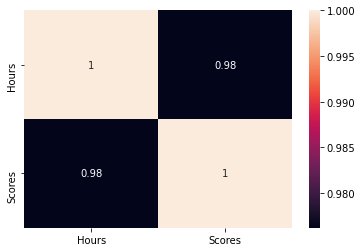

In [7]:
# checking correlation 
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot= True)
plt.show()

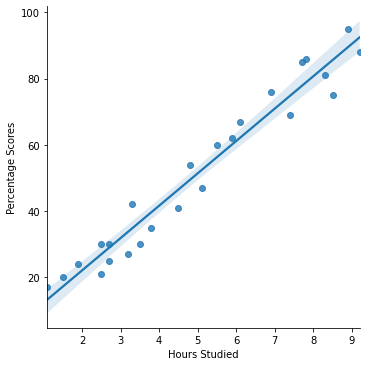

In [8]:
# linear regression plot
sns.lmplot(x='Hours',y='Scores',data=df)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

### From the above visualizations, we can clearly see that there is a high positive correlation between Hours studied and Percentage scores obtained.

## 4. SPLITTING AND TRAINING THE MODEL

In [10]:
# preparing the data for training the model
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [13]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

In [16]:
## We have Splitted Our Data Using 70:30 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("y test.shape  =", y_test.shape)

X train.shape = (17, 1)
y train.shape = (17,)
X test.shape  = (8, 1)
y test.shape  = (8,)


## TRAINING THE MODEL

In [17]:
# importing linear regression algorithm
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [18]:
##Fitting Training Data
linreg.fit(X_train,y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


In [19]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = 1.4054847469236904 
B1 = [10.23215989]


In [20]:
##plotting the REGRESSION LINE---
# y = c + mx
Y0 = linreg.intercept_ + linreg.coef_*X_train

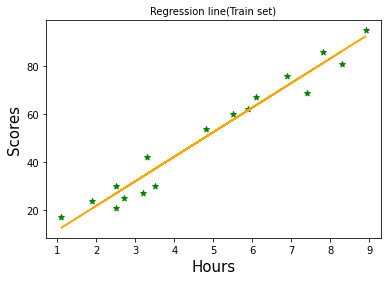

In [22]:
##plotting on train data
plt.scatter(X_train,y_train,color='green',marker='*')
plt.plot(X_train,Y0,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

## Working on Test Data

In [23]:
# predicting the Scores for test data
y_pred=linreg.predict(X_test)
print(y_pred)

[53.58950021 47.45020427 16.75372459 80.19311593 40.28769235 88.37884385
 29.03231646 95.54135577]


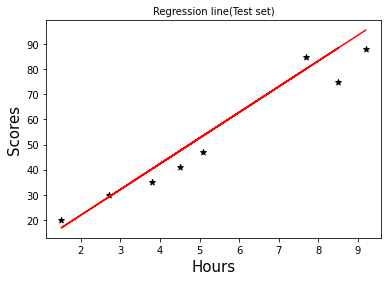

In [24]:
#plotting line on test data
plt.plot(X_test,y_pred,color='red')
plt.scatter(X_test,y_test,color='black',marker='*')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

## Step 5 : EVALUATE THE SCORE

### Comparing Actual vs Predicted Scores

In [25]:
# comparing the actual and predicted scores
Y_test = list(y_test)
prediction=list(y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test,'Result':prediction})
df_compare

,Actual,Result
0,47,53.589500
1,41,47.450204
2,20,16.753725
3,85,80.193116
4,35,40.287692
5,75,88.378844
6,30,29.032316
7,88,95.541356


## ACCURACY OF THE MODEL

In [26]:
# checking Goodness of fit Test
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9210048264474521

## Above 92% percentage indicates that above fitted Model is a GOOD MODEL.

## Predicting the Error

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = metrics.mean_squared_error(y_test,y_pred) # Mean Squared Error
root_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred)) # Root Mean Squared Error
Abs_E = np.sqrt(metrics.mean_absolute_error(y_test,y_pred)) # Root mean Absolute Error
print("Mean Squared Error=",MSE)
print("Root Mean Squared Error=",root_E)
print("Mean Absolute Error=",Abs_E)

Mean Squared Error= 47.9290872534217
Root Mean Squared Error= 6.923083652060092
Mean Absolute Error= 2.4563295652440362


## Step 6 : PREDICT THE SCORE

In [30]:
Prediction_score = linreg.predict([[9.25]])
print("Predicted Score for a student studying 9.25 hours :",Prediction_score)

Predicted Score for a student studying 9.25 hours : [96.05296377]


## CONCLUSION:
### From the above result we can say that if a student studies for 9.25 hours then student will secured 96.05 MARKS.

# THANK YOU!